In [ ]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#cell for any internal changes

In [ ]:
#Mounted Google Drive and loaded datasets from drive
plant1_generation = pd.read_csv("/content/drive/MyDrive/Projects/Project Hire/1. Solar Project/Solar Power Generation Data/Plant_1_Generation_Data.csv")
plant2_generation = pd.read_csv("/content/drive/MyDrive/Projects/Project Hire/1. Solar Project/Solar Power Generation Data/Plant_2_Generation_Data.csv")
plant1_weather = pd.read_csv("/content/drive/MyDrive/Projects/Project Hire/1. Solar Project/Solar Power Generation Data/Plant_1_Weather_Sensor_Data.csv")
plant2_weather = pd.read_csv("/content/drive/MyDrive/Projects/Project Hire/1. Solar Project/Solar Power Generation Data/Plant_2_Weather_Sensor_Data.csv")


In [ ]:
#Check the shape of the dataset
print("Plant 1 Generation Data Shape:", plant1_generation.shape)
print("Plant 2 Generation Data Shape:", plant2_generation.shape)
print("Plant 1 Weather Data Shape:", plant1_weather.shape)
print("Plant 2 Weather Data Shape:", plant2_weather.shape)

Plant 1 Generation Data Shape: (68778, 7)
Plant 2 Generation Data Shape: (67698, 7)
Plant 1 Weather Data Shape: (3182, 6)
Plant 2 Weather Data Shape: (3259, 6)


In [ ]:
#create dictionary so that can use for loop to do further analysis and to avoid code line repetition.
datasets = {
    "Plant 1 Generation Dataset:":plant1_generation,
    "Plant 2 Generation Dataset:":plant2_generation,
    "Plant 1 Weather Dataset:":plant1_weather,
    "Plant 2 Weather Dataset:":plant2_weather
}

In [ ]:
#For loop - checking sample of each dataset
for name,df in datasets.items():
  print(f"\n{name}\n",df.head())



Plant 1 Generation Dataset:
           DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0  

Plant 2 Generation Dataset:
              DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  2020-05-15 00:00:00   4136001  4UPUqMRk7TRMgml       0.0       0.0   
1  2020-05-15 00:00:00   4136001  81aHJ1q11NBPMrL       0.0       0.0   
2  2020-05-15 00:00:00   4136001  9kRcWv60rDACzjR       0.0       0.0   
3  2020-05-15 00:00:00   4136001  Et9kgGMDl729K

In [ ]:
#check info(), nulls and duplicates
for name,df in datasets.items():
  print(f"\n{name}")
  print("\nNull Values in dataset:",df.isnull().sum().sum())
  print("Duplicate Values in dataset:",df.duplicated().sum(),"\n")
  print(df.info())


Plant 1 Generation Dataset:

Null Values in dataset: 0
Duplicate Values in dataset: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB
None

Plant 2 Generation Dataset:

Null Values in dataset: 0
Duplicate Values in dataset: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  i

In [ ]:
#check the date time formats in all datasets
for name,df in datasets.items():
  print(f"{name}")
  print(df['DATE_TIME'].head())

Plant 1 Generation Dataset:
0    15-05-2020 00:00
1    15-05-2020 00:00
2    15-05-2020 00:00
3    15-05-2020 00:00
4    15-05-2020 00:00
Name: DATE_TIME, dtype: object
Plant 2 Generation Dataset:
0    2020-05-15 00:00:00
1    2020-05-15 00:00:00
2    2020-05-15 00:00:00
3    2020-05-15 00:00:00
4    2020-05-15 00:00:00
Name: DATE_TIME, dtype: object
Plant 1 Weather Dataset:
0    2020-05-15 00:00:00
1    2020-05-15 00:15:00
2    2020-05-15 00:30:00
3    2020-05-15 00:45:00
4    2020-05-15 01:00:00
Name: DATE_TIME, dtype: object
Plant 2 Weather Dataset:
0    2020-05-15 00:00:00
1    2020-05-15 00:15:00
2    2020-05-15 00:30:00
3    2020-05-15 00:45:00
4    2020-05-15 01:00:00
Name: DATE_TIME, dtype: object


In [ ]:
#converting date columns to datetime data type
for name,df in datasets.items():
  df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'],dayfirst=True, errors = 'coerce')

  if df['DATE_TIME'].dtypes == 'object':
    print("Data Type Not Converted")
  else:
    print("Data Type Converted from object to date_time")


Data Type Converted from object to date_time
Data Type Converted from object to date_time
Data Type Converted from object to date_time
Data Type Converted from object to date_time


/tmp/ipython-input-2287957324.py:3: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'],dayfirst=True, errors = 'coerce')
/tmp/ipython-input-2287957324.py:3: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'],dayfirst=True, errors = 'coerce')
/tmp/ipython-input-2287957324.py:3: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'],dayfirst=True, errors = 'coerce')


In [ ]:
#verify samples if the conversion is completed
for name,df in datasets.items():
  print(f"{name}")
  print(df['DATE_TIME'].head())

Plant 1 Generation Dataset:
0   2020-05-15
1   2020-05-15
2   2020-05-15
3   2020-05-15
4   2020-05-15
Name: DATE_TIME, dtype: datetime64[ns]
Plant 2 Generation Dataset:
0   2020-05-15
1   2020-05-15
2   2020-05-15
3   2020-05-15
4   2020-05-15
Name: DATE_TIME, dtype: datetime64[ns]
Plant 1 Weather Dataset:
0   2020-05-15 00:00:00
1   2020-05-15 00:15:00
2   2020-05-15 00:30:00
3   2020-05-15 00:45:00
4   2020-05-15 01:00:00
Name: DATE_TIME, dtype: datetime64[ns]
Plant 2 Weather Dataset:
0   2020-05-15 00:00:00
1   2020-05-15 00:15:00
2   2020-05-15 00:30:00
3   2020-05-15 00:45:00
4   2020-05-15 01:00:00
Name: DATE_TIME, dtype: datetime64[ns]


In [ ]:
#check for if any naT values in the datasets.
for name,df in datasets.items():
  if df['DATE_TIME'].isna().sum() > 0:
    print(f"{name} ""Invalid Date Values")
  else:
    print(f"{name} ""No Invalid Data Values")

Plant 1 Generation Dataset: No Invalid Data Values
Plant 2 Generation Dataset: No Invalid Data Values
Plant 1 Weather Dataset: No Invalid Data Values
Plant 2 Weather Dataset: No Invalid Data Values


In [ ]:
#check the statistical insight of each dataset
for name,df in datasets.items():
  print(f"\n{name}\n",df.drop(columns=['DATE_TIME', 'PLANT_ID']).describe())



Plant 1 Generation Dataset:
            DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count  68778.000000  68778.000000  68778.000000  6.877800e+04
mean    3147.426211    307.802752   3295.968737  6.978712e+06
std     4036.457169    394.396439   3145.178309  4.162720e+05
min        0.000000      0.000000      0.000000  6.183645e+06
25%        0.000000      0.000000      0.000000  6.512003e+06
50%      429.000000     41.493750   2658.714286  7.146685e+06
75%     6366.964286    623.618750   6274.000000  7.268706e+06
max    14471.125000   1410.950000   9163.000000  7.846821e+06

Plant 2 Generation Dataset:
            DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count  67698.000000  67698.000000  67698.000000  6.769800e+04
mean     246.701961    241.277825   3294.890295  6.589448e+08
std      370.569597    362.112118   2919.448386  7.296678e+08
min        0.000000      0.000000      0.000000  0.000000e+00
25%        0.000000      0.000000    272.750000  1.996494e+07
50%       

In [ ]:
#simple IQR-based outlier detection
for name, df in datasets.items():
    print(f"\n{name} — Outlier Summary:")

    # exclude non-numeric columns
    num_df = df.select_dtypes(include='number')

    for col in num_df.columns:
        Q1 = num_df[col].quantile(0.25)
        Q3 = num_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = ((num_df[col] < lower_bound) | (num_df[col] > upper_bound)).sum()
        if outliers > 0:
            print(f"  {col}: {outliers} potential outliers out of total {num_df.shape[0]} rows")



Plant 1 Generation Dataset: — Outlier Summary:

Plant 2 Generation Dataset: — Outlier Summary:
  DC_POWER: 3079 potential outliers out of total 67698 rows
  AC_POWER: 2993 potential outliers out of total 67698 rows

Plant 1 Weather Dataset: — Outlier Summary:
  IRRADIATION: 2 potential outliers out of total 3182 rows

Plant 2 Weather Dataset: — Outlier Summary:
  MODULE_TEMPERATURE: 2 potential outliers out of total 3259 rows
  IRRADIATION: 1 potential outliers out of total 3259 rows


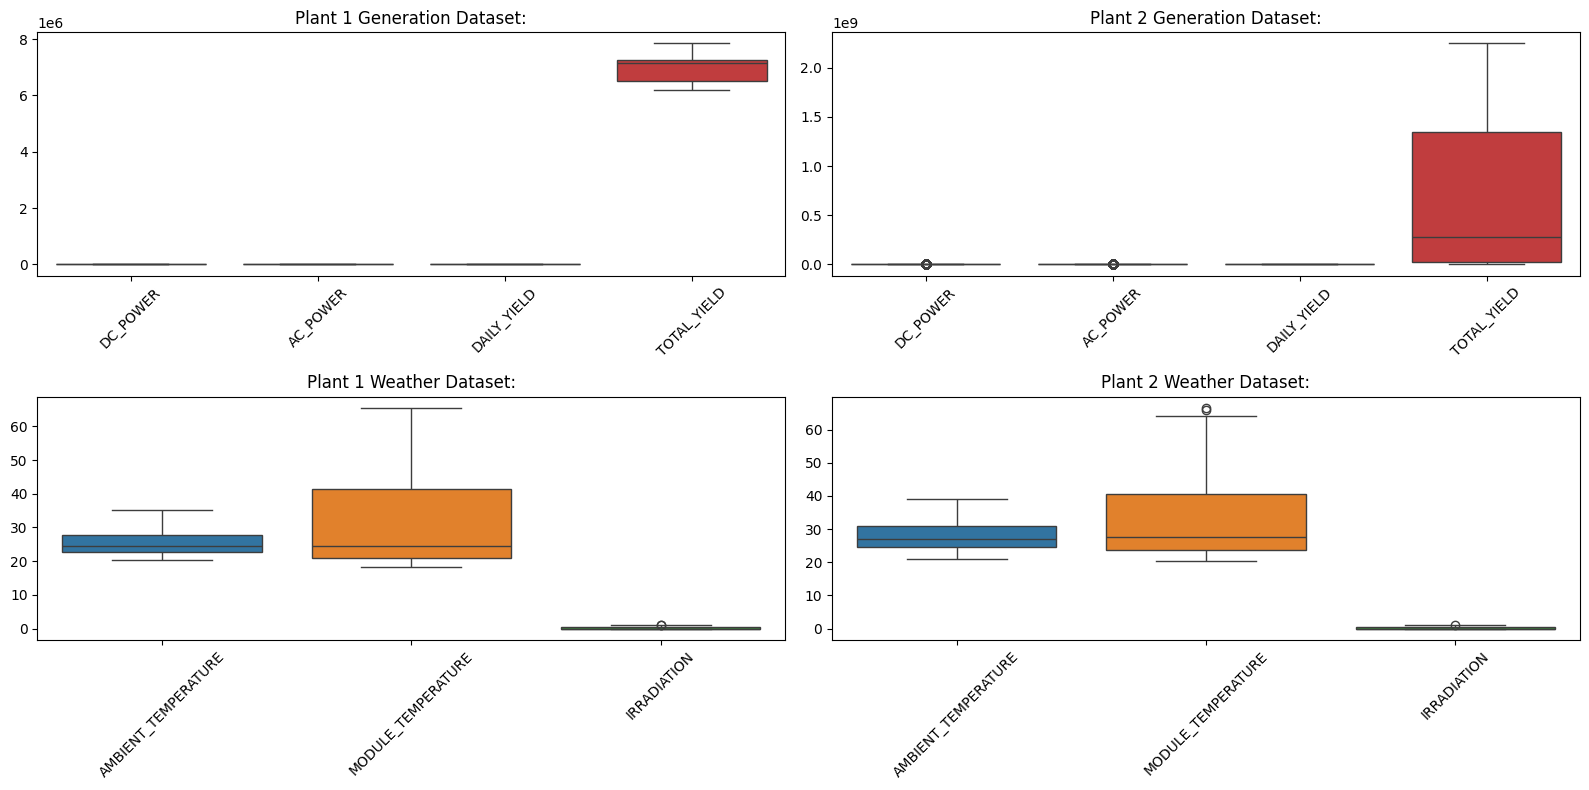

In [ ]:
#Boxplot for each dataset to understand distribution and outliers
plt.figure(figsize=(16,8))
for i, (name, df) in enumerate(datasets.items(), 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df.drop(columns=['PLANT_ID']).select_dtypes(include='number'))
    plt.title(name)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#check time stamp frequency to decide how to merge the dataset.
for name, df in datasets.items():
    print(f"\n{name}")

    # Ensure datetime column is sorted
    df = df.sort_values("DATE_TIME")

    # If duplicates (like multiple SOURCE_KEYs) exist, keep only unique timestamps
    df_unique = df["DATE_TIME"].drop_duplicates().reset_index(drop=True)

    # Compute time differences
    time_diffs = df_unique.diff().dropna()

    # Get most frequent time difference (mode)
    most_common_gap = time_diffs.value_counts()

    print(f"Most common time frequencies: {most_common_gap}")



Plant 1 Generation Dataset:
Most common time frequencies: DATE_TIME
0 days 00:15:00    3148
0 days 00:30:00       2
0 days 03:00:00       1
0 days 04:15:00       1
0 days 01:00:00       1
0 days 09:00:00       1
0 days 01:45:00       1
0 days 08:00:00       1
0 days 00:45:00       1
Name: count, dtype: int64

Plant 2 Generation Dataset:
Most common time frequencies: DATE_TIME
0 days 00:15:00    3253
0 days 00:30:00       5
Name: count, dtype: int64

Plant 1 Weather Dataset:
Most common time frequencies: DATE_TIME
0 days 00:15:00    3173
0 days 00:30:00       2
0 days 01:00:00       1
0 days 03:00:00       1
0 days 04:15:00       1
0 days 07:15:00       1
0 days 01:30:00       1
0 days 04:30:00       1
Name: count, dtype: int64

Plant 2 Weather Dataset:
Most common time frequencies: DATE_TIME
0 days 00:15:00    3253
0 days 00:30:00       5
Name: count, dtype: int64


In [ ]:
# Make sure datetime columns are proper datetime type and then we merge generation and weather datasets

# Plant 1
plant1_merged = pd.merge(
    datasets["Plant 1 Generation Dataset:"],
    datasets["Plant 1 Weather Dataset:"],
    on="DATE_TIME",
    how="left"   # or "left" if you want to keep all generation timestamps
)

# Plant 2
plant2_merged = pd.merge(
    datasets["Plant 2 Generation Dataset:"],
    datasets["Plant 2 Weather Dataset:"],
    on="DATE_TIME",
    how="left"
)

print(plant1_merged.shape, plant2_merged.shape)


(68778, 12) (67698, 12)


In [ ]:
#Creating dictionary again to avoid repetative coding.
datasets_merged = {
    "Plant 1 Merged Dataset:":plant1_merged,
    "Plant 2 Merged Dataset:":plant2_merged
}

In [ ]:
#for loop -- checking null values in each dataset
for name,df in datasets_merged.items():
  print(f"\n{name} Null Values")
  print(df.isnull().sum())


Plant 1 Merged Dataset: Null Values
DATE_TIME              0
PLANT_ID_x             0
SOURCE_KEY_x           0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
PLANT_ID_y             4
SOURCE_KEY_y           4
AMBIENT_TEMPERATURE    4
MODULE_TEMPERATURE     4
IRRADIATION            4
dtype: int64

Plant 2 Merged Dataset: Null Values
DATE_TIME              0
PLANT_ID_x             0
SOURCE_KEY_x           0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
PLANT_ID_y             0
SOURCE_KEY_y           0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64


In [ ]:
#check what are those rows with null values.
for name,df in datasets_merged.items():
  print(f"\n{name} Missing Rows:")
  null_rows = df[df[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']].isnull().any(axis=1)]

  if null_rows.empty:
    print("Dataset has No Null Rows")
  else:
    display(null_rows)


Plant 1 Merged Dataset: Missing Rows:


,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
38544,2020-06-03 14:00:00,4135001,1IF53ai7Xc0U56Y,7003.0,685.8,5601.0,6330385.0,NaN,NaN,NaN,NaN,NaN
38545,2020-06-03 14:00:00,4135001,adLQvlD726eNBSB,7204.0,705.4,5685.0,6419961.0,NaN,NaN,NaN,NaN,NaN
38546,2020-06-03 14:00:00,4135001,wCURE6d3bPkepu2,7545.0,738.7,5579.0,6928448.0,NaN,NaN,NaN,NaN,NaN
38547,2020-06-03 14:00:00,4135001,z9Y9gH1T5YWrNuG,7946.0,777.8,5541.0,7152815.0,NaN,NaN,NaN,NaN,NaN



Plant 2 Merged Dataset: Missing Rows:
Dataset has No Null Rows


In [ ]:
"""
as seeing the above table looks like there is no record in Plant 1 Weather Dataset at 14:00
that is why when we merge Plant 1 Generation and Weather dataset we get null values

"""
#we will try to fix this by interpolating values in plant 1 weather dataset.

# Make sure DATE_TIME is datetime and sorted
plant1_weather['DATE_TIME'] = pd.to_datetime(plant1_weather['DATE_TIME'])
plant1_weather = plant1_weather.set_index('DATE_TIME').sort_index()

# Create a full 15-minute timeline from start to end
full_index = pd.date_range(start=plant1_weather.index.min(), end=plant1_weather.index.max(), freq='15T')

# Reindex your DataFrame to include *all* 15-min timestamps
plant1_weather_reindexed = plant1_weather.reindex(full_index)

# Now interpolate missing weather readings
plant1_weather_reindexed[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']] = (
    plant1_weather_reindexed[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
        .interpolate(method='time', limit_direction='both')
)

plant1_weather_reindexed.head(10)


/tmp/ipython-input-2856541317.py:13: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_index = pd.date_range(start=plant1_weather.index.min(), end=plant1_weather.index.max(), freq='15T')


,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
2020-05-15 00:00:00,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2020-05-15 00:15:00,4135001.0,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2020-05-15 00:30:00,4135001.0,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
2020-05-15 00:45:00,4135001.0,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
2020-05-15 01:00:00,4135001.0,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
2020-05-15 01:15:00,4135001.0,HmiyD2TTLFNqkNe,24.536092,21.968571,0.0
2020-05-15 01:30:00,4135001.0,HmiyD2TTLFNqkNe,24.638674,22.352926,0.0
2020-05-15 01:45:00,4135001.0,HmiyD2TTLFNqkNe,24.873022,23.160919,0.0
2020-05-15 02:00:00,4135001.0,HmiyD2TTLFNqkNe,24.936930,23.026113,0.0
2020-05-15 02:15:00,4135001.0,HmiyD2TTLFNqkNe,25.012248,23.343229,0.0


In [ ]:
print(f"Plant 1 Weather Shape Before (Date_Time is Index) : {plant1_weather.shape} and Plant 1 Weather Shape After (Date_Time is Index): {plant1_weather_reindexed.shape}")

Plant 1 Weather Shape Before (Date_Time is Index) : (3182, 5) and Plant 1 Weather Shape After (Date_Time is Index): (3264, 5)


In [ ]:
# names I use below — change if your variables are different
# plant1_gen = datasets["Plant 1 Generation Dataset:"].copy()
plant1_weather_filled = plant1_weather_reindexed.reset_index().rename(columns={'index':'DATE_TIME'})
# OR, if you already created plant1_weather_filled as reset_index() earlier, just use that


In [ ]:
plant1_weather_filled.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001.0,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001.0,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001.0,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001.0,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [ ]:
plant1_weather_filled.shape

(3264, 6)

In [ ]:
#Merge again now Plant 1 generation and Plant 1 weather filled
plant1_merged = pd.merge(
    plant1_generation,
    plant1_weather_filled,
    on='DATE_TIME',
    how='left'   # keep all generation rows
)

In [ ]:
plant1_merged.isnull().sum()

,0
DATE_TIME,0
PLANT_ID_x,0
SOURCE_KEY_x,0
DC_POWER,0
AC_POWER,0
DAILY_YIELD,0
TOTAL_YIELD,0
PLANT_ID_y,4
SOURCE_KEY_y,4
AMBIENT_TEMPERATURE,0


In [ ]:
#Creating dictionary once more time so new plant 1 merged is re put in dictionary
datasets_merged = {
    "Plant 1 Merged Dataset:":plant1_merged,
    "Plant 2 Merged Dataset:":plant2_merged
}

In [ ]:
#check null values now
for name,df in datasets_merged.items():
  print(f"\n{name} Null Values")
  print(df.isnull().sum())


Plant 1 Merged Dataset: Null Values
DATE_TIME              0
PLANT_ID_x             0
SOURCE_KEY_x           0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
PLANT_ID_y             4
SOURCE_KEY_y           4
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

Plant 2 Merged Dataset: Null Values
DATE_TIME              0
PLANT_ID_x             0
SOURCE_KEY_x           0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
PLANT_ID_y             0
SOURCE_KEY_y           0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64


In [ ]:
#check sample
for name,df in datasets_merged.items():
  print(f"\n{name}")
  display(df.head())
  print(df.columns)


Plant 1 Merged Dataset:


,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0


Index(['DATE_TIME', 'PLANT_ID_x', 'SOURCE_KEY_x', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD', 'PLANT_ID_y', 'SOURCE_KEY_y',
       'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION'],
      dtype='object')

Plant 2 Merged Dataset:


,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
2,2020-05-15,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
3,2020-05-15,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
4,2020-05-15,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0


Index(['DATE_TIME', 'PLANT_ID_x', 'SOURCE_KEY_x', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD', 'PLANT_ID_y', 'SOURCE_KEY_y',
       'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION'],
      dtype='object')


In [ ]:
#arrange columns and remove columns that are not required such as plant_id_y and source_key_y
arrange_columns =['DATE_TIME', 'PLANT_ID_x', 'SOURCE_KEY_x','AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'DC_POWER', 'AC_POWER','DAILY_YIELD', 'TOTAL_YIELD', ]

plant1 = plant1_merged[arrange_columns]
plant2 = plant2_merged[arrange_columns]


In [ ]:
#new dictionary
datasets_v1 = {
    "Plant 1 Dataset":plant1,
    "Plant 2 Dataset":plant2
}

In [ ]:
#recheck for data-types, null, duplicates
for name,df in datasets_v1.items():
  print(f"\n{name}:")
  display(df.dtypes)
  display(df.isnull().sum())
  print("\nDuplicate Values: ",df.duplicated().sum())
  display(df.head(2))


Plant 1 Dataset:


,0
DATE_TIME,datetime64[ns]
PLANT_ID_x,int64
SOURCE_KEY_x,object
AMBIENT_TEMPERATURE,float64
MODULE_TEMPERATURE,float64
IRRADIATION,float64
DC_POWER,float64
AC_POWER,float64
DAILY_YIELD,float64
TOTAL_YIELD,float64


,0
DATE_TIME,0
PLANT_ID_x,0
SOURCE_KEY_x,0
AMBIENT_TEMPERATURE,0
MODULE_TEMPERATURE,0
IRRADIATION,0
DC_POWER,0
AC_POWER,0
DAILY_YIELD,0
TOTAL_YIELD,0



Duplicate Values:  0


,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,25.184316,22.857507,0.0,0.0,0.0,0.0,6259559.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,25.184316,22.857507,0.0,0.0,0.0,0.0,6183645.0



Plant 2 Dataset:


,0
DATE_TIME,datetime64[ns]
PLANT_ID_x,int64
SOURCE_KEY_x,object
AMBIENT_TEMPERATURE,float64
MODULE_TEMPERATURE,float64
IRRADIATION,float64
DC_POWER,float64
AC_POWER,float64
DAILY_YIELD,float64
TOTAL_YIELD,float64


,0
DATE_TIME,0
PLANT_ID_x,0
SOURCE_KEY_x,0
AMBIENT_TEMPERATURE,0
MODULE_TEMPERATURE,0
IRRADIATION,0
DC_POWER,0
AC_POWER,0
DAILY_YIELD,0
TOTAL_YIELD,0



Duplicate Values:  0


,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4136001,4UPUqMRk7TRMgml,27.004764,25.060789,0.0,0.0,0.0,9425.0,2.429011e+06
1,2020-05-15,4136001,81aHJ1q11NBPMrL,27.004764,25.060789,0.0,0.0,0.0,0.0,1.215279e+09


In [ ]:
#extract date terms for modeling purpose and further analysis.
for name,df in datasets_v1.items():
  df=df.copy()
  df['DAY']=df['DATE_TIME'].dt.day
  df['HOUR']=df['DATE_TIME'].dt.hour
  df['MONTH']=df['DATE_TIME'].dt.month
  datasets_v1[name]=df
  display(df.head())

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DAY,HOUR,MONTH
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,25.184316,22.857507,0.0,0.0,0.0,0.0,6259559.0,15,0,5
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,25.184316,22.857507,0.0,0.0,0.0,0.0,6183645.0,15,0,5
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,25.184316,22.857507,0.0,0.0,0.0,0.0,6987759.0,15,0,5
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,25.184316,22.857507,0.0,0.0,0.0,0.0,7602960.0,15,0,5
4,2020-05-15,4135001,McdE0feGgRqW7Ca,25.184316,22.857507,0.0,0.0,0.0,0.0,7158964.0,15,0,5


,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DAY,HOUR,MONTH
0,2020-05-15,4136001,4UPUqMRk7TRMgml,27.004764,25.060789,0.0,0.0,0.0,9425.000000,2.429011e+06,15,0,5
1,2020-05-15,4136001,81aHJ1q11NBPMrL,27.004764,25.060789,0.0,0.0,0.0,0.000000,1.215279e+09,15,0,5
2,2020-05-15,4136001,9kRcWv60rDACzjR,27.004764,25.060789,0.0,0.0,0.0,3075.333333,2.247720e+09,15,0,5
3,2020-05-15,4136001,Et9kgGMDl729KT4,27.004764,25.060789,0.0,0.0,0.0,269.933333,1.704250e+06,15,0,5
4,2020-05-15,4136001,IQ2d7wF4YD8zU1Q,27.004764,25.060789,0.0,0.0,0.0,3177.000000,1.994153e+07,15,0,5


In [ ]:
#rearrange columns for better readabiiity
arrange_columns =['DATE_TIME','MONTH', 'DAY', 'HOUR','PLANT_ID_x', 'SOURCE_KEY_x', 'AMBIENT_TEMPERATURE','MODULE_TEMPERATURE', 'IRRADIATION', 'DC_POWER', 'AC_POWER','DAILY_YIELD', 'TOTAL_YIELD',]

plant1 = plant1[arrange_columns]
plant2 = plant2[arrange_columns]

In [ ]:
#Download the merged datasets.
from google.colab import files

# Example: save your DataFrame as CSV
plant1.to_csv('plant1_merged.csv', index=False)
plant2.to_csv('plant2_merged.csv', index=False)

# Download it to your computer
files.download('plant1_merged.csv')
files.download('plant2_merged.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>